# Homewok 1: Simulation Study

Welcome to the course **AI and Deep learning**!

Since most of you are not very familiar with deep learning, let us first review some basic concepts in traditional statistic courses. Specifically, the first homework help you to code up a linear regression model, and we are going to generate a training data, visualize the data, estimate the model parameters, and make inference about the model parameters. Hope you enjoy the first homework!  

**Learning Goal**: In this homework, we are going to conduct a simple simulation study based on a linear regression. After this homework, you will know:

* Basic tips about how to setup a statistic simulation study.
* How to decompose a certain task into severl small functions.
* How to estimate the model parameters based on a linear regression model.
* How to obtain the coverage rates based on certain asymptotic results.
* How to do vectorization based on a linear regression model. We also compare the computation efficiency between summation and vectorization. 


## Table of content
* [1 - Packages](#1)
* [2 - Generate a training dataset](#2)
* [3 - Parameter estimation](#3) 
* [4 - Statistical inference](#4)
* [5 - Computation efficiency](#5)
* [6 - Additional homework](#6)

<a name='1'></a>
## 1- Packages

In order to finish a task, we need commands from certain **Python** packages. Thus, the first thing to do is to import the packages we need. One of the commonly used package is **numpy**.

In [2]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
import numpy as np
import matplotlib.pyplot as plt # for plots
import scipy.stats # for quantile calculation when we consider coverage rates
import time # for computation efficiency comparison

<a name='2'></a>
## 2 - Generate a training dataset

The main difference between a simulation study and a real data application is that a model is pre-specified for a simulation study. Then, we can generate different training datasets from that model. **In order to guarantee that our simulation results are reproducible, we need to control the random seed.** That is, after controlling the seed, others can generate the **SAME** random variables as we did, so our simulation results can be reproduced.

Since we are using the package **numpy** (or **np**) to generate random variables, the following command is useful:
* np.random.seed(xxxx) # xxxx is the seed to generate random numbers. 

The following is a simple example, which may be useful. 

In [3]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
np.random.seed(1)
a = np.random.normal(1) # the first random variable generated after the seed.
print(a)
b = np.random.normal(1) # the second random variable generated after the seed.
print(b)

np.random.seed(1)
c = np.random.normal(1) # the first random variable generated after the seed. It should equal to a.
print(c)
print(a==c)

2.6243453636632417
0.3882435863499246
2.6243453636632417
True


Now, it is your turn to generate a training dataset. Consider the following linear regression model 
\begin{equation}
y^{(i)}=b_0+w_0x^{(i)}+\epsilon^{(i)}\quad(i=1,\ldots,n),\tag{1}\label{eq: model setup}
\end{equation}
where $b_0=w_0=1$, $x^{(i)}\sim N(2,2^2)$ and $\epsilon^{(i)}\sim N(0,1)$ for $i=1,\ldots,n$.

Your first job is to write a function to generate a training dataset of size $n$ with a random number $rn$. That is, compete the following function. (**DO NOT CHANGE THE EXISTING PARTS**) The following command may be useful, and check the help document for details:

* `np.random.normal`: generate normally distributed random variables.



In [4]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
# Provide your code between ``YOUR CODE BEGINS HERE (approximately 4 lines)'' and ``YOUR CODE ENDS''.
def train_data_generation(n, rn):
    # n: sample size
    # rn: random seed
    
    # Step 1. Set random seed to be rn
    # Step 2. Generate x of size n from a normal distribution with mean 2 and standard deviation 2
    # Step 3. Generate \epsilon of size n from a normal distribution with mean 2 and standard deviation 2
    # Step 4. Generate y by (1)
    
    ### YOUR CODE BEGINS HERE (approximately 4 lines)
    np.random.seed(rn)
    x = np.random.normal(loc=2,scale=2,size=(n,1))
    epsilon = np.random.normal(loc=0,scale=1,size=(n,1))
    y = 1 + 1*x + epsilon
    ### YOUR CODE ENDS
    
    
    return x, y
    

To visualize your data, you may would like to run the following code.

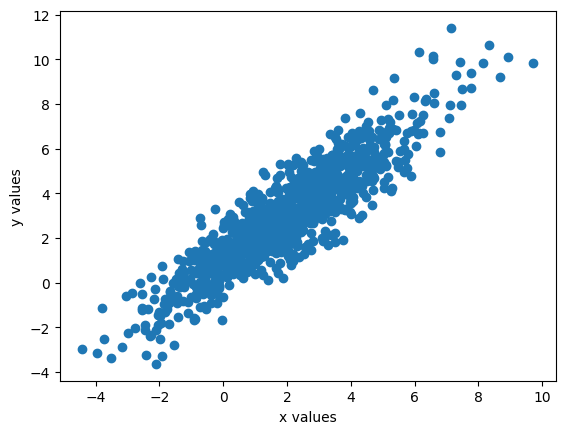

In [5]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(1000, 100)

plt.scatter(x,y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

<a name='3'></a>
## 3 - Parameter estimation

Denote $\tilde{x}^{(i)} = (1,x^{(i)})^T$, $X=(\tilde{x}^{(1)},\ldots,\tilde{x}^{(n)})^{T}\in\mathbb{R}^{n\times2}$ and $Y=(y^{(1)},\ldots,y^{(n)})^T$. Based on the normal equation, we know that an estimator of $(b_0,w_0)$ in (1) is 
$$
(\hat{b}_0,\hat{w}_0) = \left(\sum_{i=1}^n \tilde{x}^{(i)}(\tilde{x}^{(i)})^T\right)^{-1}\sum_{i=1}^n \tilde{x}^{(i)}y_i = (X^TX)^{-1}X^TY. \tag{2}
$$
The first equality corresponds to the 'summation method', while the last corresponds to vectorization. 

First, we consider the 'summation method', and your job is to write a function based on the first equation of (2). The following command may be useful, and check the help document for details:
* `np.concatenate`: concatenate two arrays
* For two matrices A and B, the matrix multiplication is `A @ B`
* `np.linalg.inv`: calculate the inverse of a matrix
* `np.flatten`: obtain a 1d array.

In [6]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def estimation_summation(x,y):
    # x: the generated feature vector of length n
    # y: the generated feature vector of length n
    
    # Step 1. Obtain the sample size
    # Step 2. Augment the feature vector with the intercept term, check the relationship between \tilde{x} and x
    # Step 3. Initialize 'xx' by a 2X2 zero matrix
    # Step 4. Initialize 'xy' by a 2X1 zero matrix
    # Step 5. Calculate the summations for 'xx' and 'xy' based on the first equation of (2)
    # Step 6. Calculate the inverse of 'xx'
    # Step 7. Obtain the estimator as the first equation of (2)
    
    ### YOUR CODE BEGINS HERE (approximately 10 lines)
    n = len(x)
    aug_x = np.concatenate((np.ones((n,1)),x),axis=1)
    xx = np.zeros((2,2))
    xy = np.zeros((2,1))
    
    for i in range(n):
        example_i = aug_x[i, :].reshape(-1,1)
        xx += example_i @ example_i.T
        xy += example_i * y[i]
    
    xx_inv = np.linalg.inv(xx)
    par_est = xx_inv @ xy
    ### YOUR CODE ENDS
    
    return par_est.flatten()


Next, we consider vectorization, and complete the following function.

In [7]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def estimation_vectorization(x,y):
    # x: the generated feature vector of length n
    # y: the generated feature vector of length n
    
    # Step 1. Obtain the sample size
    # Step 2. Augment the feature vector with the intercept term, check the relationship between \tilde{x} and x
    # Step 3. Obtain 'xx' by X^TX, where X is the augmented matrix of size nX2
    # Step 4. Obtain 'xy' by X^TY, where the shape of Y is nX1 
    # Step 5. Calculate the inverse of 'xx'
    # Step 6. Obtain the estimator as the second equation of (2)
    
    ### YOUR CODE BEGINS HERE (approximately 6 lines)
    n = len(x)
    aug_x = np.concatenate((np.ones((n,1)),x),axis=1)
    
    xx = aug_x.T @ aug_x
    xy = aug_x.T @ y
   
    xx_inv = np.linalg.inv(xx)
    par_est = xx_inv @ xy
    ### YOUR CODE ENDS

    return par_est.flatten()

In [8]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
print(estimation_summation(x,y))
print(estimation_vectorization(x,y))
print('The two estimators above should be identical')
print('The true parameters are 1 and 1')

[1.01322026 0.99776934]
[1.01322026 0.99776934]
The two estimators above should be identical
The true parameters are 1 and 1


<a name='4'></a>
## 4 - Statistical inference
Usually, we conduct 1\,000 Monte Carlo simulations. That is, we generate the training datasets of size $n$ independently 1\,000 times. Then, for each generated training dataset, we estimate the model parameters $(b_0,w_0)$. Then, we pool them together to check their bias, variance and MSE. If we have more than one estimation methods, we can compare when in terms of bias, variance and MSE. In this homework, even though we have two different methods to estimate the model parameters, their results should be identical. Thus, we only consider the vectorization method, and we would compare the computaion efficiency of the two estimation methods in the next section.

We first consider the case with $n=1\,000$, and record all the estimated parameters.

In [9]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
n = 1000
par_result = np.zeros((1000,2))

for i in range(1000):
    x, y = train_data_generation(n=n, rn=i) # the random seed is set to be i
    par_result[i,:] = estimation_vectorization(x,y)

Then, we check the bias, variance and MSE for the two estimators. 

In [10]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
bias_est = np.mean(par_result,axis = 0)-1
var_est = np.var(par_result,axis = 0)
mse_est = bias_est**2 + var_est
print('The bias for estimating b0 and w0 is')
print(bias_est)
print('The variance for estimating b0 and w0 is')
print(var_est)
print('The mse for estimating b0 and w0 is')
print(mse_est)

The bias for estimating b0 and w0 is
[5.59456735e-05 2.83427856e-04]
The variance for estimating b0 and w0 is
[0.00200172 0.0002554 ]
The mse for estimating b0 and w0 is
[0.00200173 0.00025548]


Please notice that under the model setup (1), the theoretical variance of the estimator $(\hat{b}_0,\hat{w}_0)$ conditional on the generated features should be 
$$
(X^TX)^{-1}\sigma^2,
$$
where $\sigma^2=1$ is the variance of the error term $\epsilon$ in (1). By the law of large numbers, $(X^TX)$ does not change too much for each Monte Carlo simulation, especially when $n$ is large enough. Thus, one way to check our code is to see whether the Monte Carlo variance of the two estimator matches the theoretical one approximately.


First, we consider a variance estimator, and $\hat{\sigma}^2$ can be estimated by the sample variance of $\hat{\epsilon}^{(i)}=y^{(i)} - \hat{b}_0-\hat{w}_0x^{(i)}$ for $i=1,\ldots,n$.

In [11]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def se_est(x,y):
    # x: the generated feature vector of length n
    # y: the generated feature vector of length n
    
    # Step 1. Obtain the estimator of (b_0, w_0)
    # Step 2. Obtain the errors
    # Step 3. Obtain \hat{\sigma}^2
    # Step 4. Augment the feature vector with the intercept term, check the relationship between \tilde{x} and x
    # Step 5. Obtain 'xx' by X^TX, where X is the augmented matrix of size nX2
    # Step 6. Obtain the variance estimator based on the above result.
    
    ### YOUR CODE BEGINS HERE (approximately 6 lines)
    est_par = estimation_vectorization(x,y)
    error_est = y - est_par[0] - est_par[1] * x
    sigma2_est = (error_est.T @ error_est)/(len(x)-2)
    
    aug_x = np.concatenate((np.ones((len(x), 1)), x), axis=1)
    xx = aug_x.T @ aug_x
    sd_par = np.sqrt(np.diagonal(np.linalg.inv(xx) * sigma2_est))
    ### YOUR CODE ENDS
    
    
    return sd_par

Next, we check whether our function is correct or not.

In [12]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
n = 1000
sd_result = np.zeros((1000,2))

for i in range(1000):
    x, y = train_data_generation(n=n, rn=i) # the random seed is set to be i
    sd_result[i,:] = se_est(x,y)
print('Your estimated results are:')
print(np.mean(sd_result,axis = 0))
print('Approximately, the true values are')
print(np.array([0.04361731, 0.01530787]))

Your estimated results are:
[0.04477234 0.01583325]
Approximately, the true values are
[0.04361731 0.01530787]


It can be shown that under our model setup, the following asymptotic result holds
$$
(X^TX)(\sigma^2)^{-1}((\hat{b}_0,\hat{w}_0) - (b_0,w_0))^T\to N((0,0)^T,I_2)
$$
in distribution as $n\to\infty$, where $I_2$ is a $2\times 2$ identity matrix. By this result, we can also check the coverage rates of two-sided 95\% confidence intervals 
$$
(\hat{b}_0 - q_{0.975}\hat{\sigma}_b,\hat{b}_0 - q_{0.025}\hat{\sigma}_b)\\
(\hat{w}_0 - q_{0.975}\hat{\sigma}_w,\hat{w}_0 - q_{0.025}\hat{\sigma}_w),
$$
where $q_\alpha$ is the $\alpha$-th quantile of a standard normal distribution, and $\hat{\sigma}_b$ and $\hat{\sigma}_w$ are the estimated standard error of the two estimators. 

If your results are very close to the desired value, you can move to the coverage rates. For each simulated training dataset, we need to check whether the constructed confidence interval covers the true value or not. The following command may be useful, 

* `scipy.stats.norm.ppf`: obtain quantiles of a standard normal distribution
* `and`: logic operator for 'and'.

In [13]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def cr_indicator(x,y,alpha):
    # x: the generated feature vector of length n
    # y: the generated feature vector of length n
    # alpha: significance level. For example, alpha=0.05 corresponds to a 95% two-sided confidence interval.

    # Step 1. Obtain (1-\alpha/2)th quantile of a standard normal distribution.
    # Step 2. Obtain parameter estimation 
    # Step 3. Obtain standard error estimation
    # Step 4. Generate the indicator whether the true value of b_0 lies in the confidence interval
    # Step 5. Generate the indicator whether the true value of b_0 lies in the confidence interval
    
    ### YOUR CODE BEGINS HERE (approximately 5 lines)
    quan_normal = scipy.stats.norm.ppf(1 - alpha/2)
    est_par = estimation_vectorization(x, y)
    est_se = se_est(x, y)
    
    ind_b = (est_par[0] - quan_normal * est_se[0] <= 1) and (1 <= est_par[0] + quan_normal * est_se[0])
    ind_w = (est_par[1] - quan_normal * est_se[1] <= 1) and (1 <= est_par[1] + quan_normal * est_se[1])
    ### YOUR CODE ENDS    

    
    return np.array([ind_b, ind_w])


In [14]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
cr_est = np.ones_like(par_result)-10 # Usually, we should have an NA matrix or a NULL matrix
for i in range(1000):
    x, y = train_data_generation(n=n, rn=i) # the random seed is set to be i
    cr_est[i,:]  = cr_indicator(x, y, alpha = 0.05)
print('Your coverage rates for the two parameters are:')    
print(np.mean(cr_est, axis = 0)) 

Your coverage rates for the two parameters are:
[0.955 0.952]


**If your results are close to $1-\alpha = 0.95$, then your code is good.**

<a name='5'></a>
## 5 - Computation efficiency
Even though the 'summation method' produces the same estimation results as the vectorization method, but its computation efficiency is pretty low, especially when the sample size is large. In this section, we compare the computation efficiency of the two methods. We still consider the case for $n=1\,000$.


In [15]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
T1 = time.time()
for i in range(1000):
    x, y = train_data_generation(n=n, rn=i) # the random seed is set to be i
    par_est = estimation_summation(x,y)
T2 = time.time()
print('The summation method takes about %s seconds' % ((T2 - T1)))

T1 = time.time()
for i in range(1000):
    x, y = train_data_generation(n=n, rn=i) # the random seed is set to be i
    par_est = estimation_vectorization(x,y)
T2 = time.time()
print('The vectorization method takes about %s seconds' % (T2 - T1))

The summation method takes about 2.502706527709961 seconds
The vectorization method takes about 0.03885197639465332 seconds


By comparison, we know that the vectorization method is much faster than the summation method.

<a name='6'></a>
## 6 - Additional homework
When you finish the above basic function, we consider the following additional homeworks. 

* Usually, when we conduct simulation studies, we may consider more than one setup. For simplicity, we only consider different setups for the sample size. Consider $n\in \{100, 300, 500, 1\,000\}$ and use figures to report the following aspects. Plese notice that for all figures, sample sizes index the x-axis. 
   
   * In one figure, show the bias as the y-axis and comment your results. 
   * In one figure, show the variance as the y-axis and comment your results.
   * In one figure, show the coverage rate for $b_0$ as the y-axis and comment your results.
   * In one figure, show the coverage rate for $w_0$ as the y-axis and comment your results.
   * In one figure, show the computation efficiency of the two estimation methods, and different colors should be used for different methods. Comment your results. 

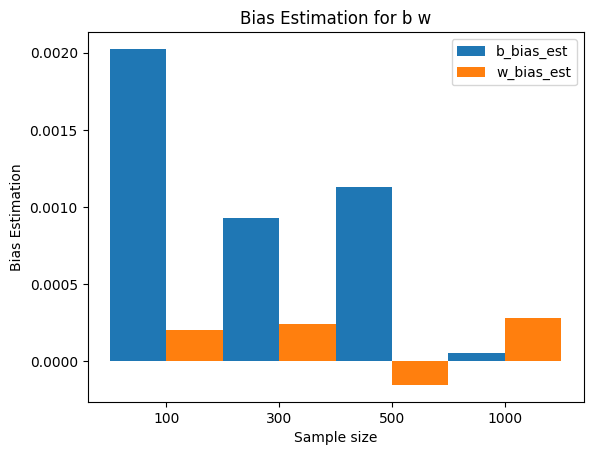

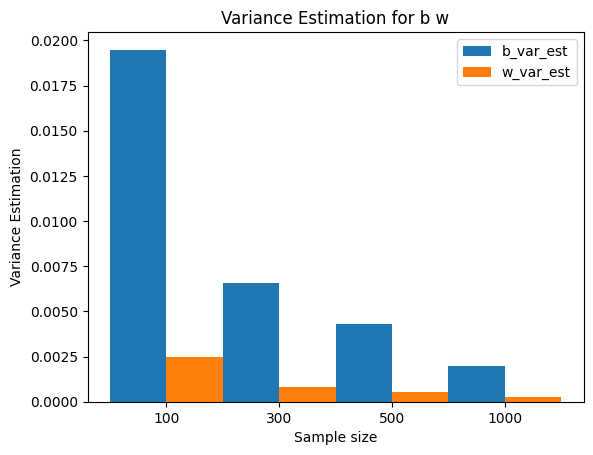

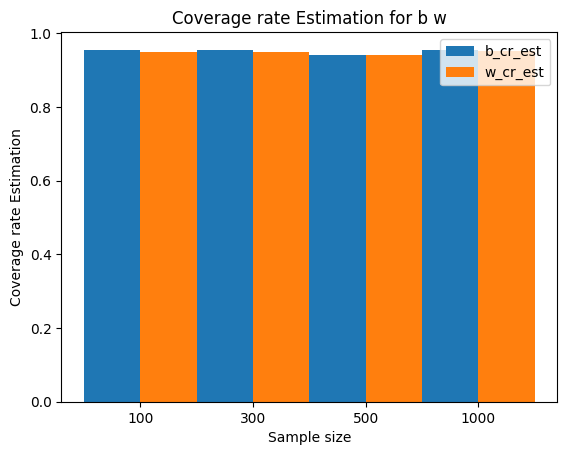

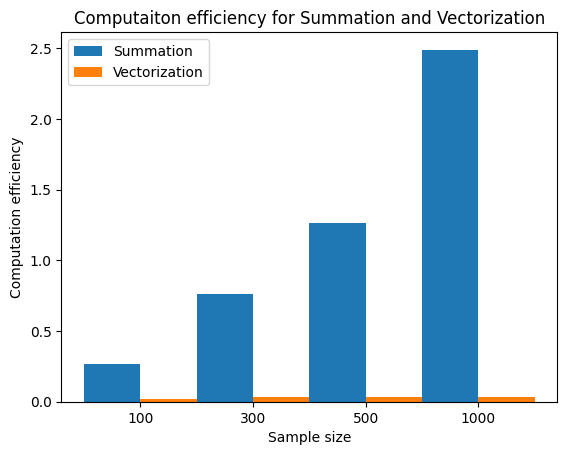

In [16]:
import matplotlib.pyplot as plt

x_axis =[100,300,500,1000] # x-axis index

bias_est = np.zeros((len(x_axis),2))
var_est = np.zeros((len(x_axis),2))
coverage_rate = np.zeros((len(x_axis),2))
computation_efficiency = np.zeros((len(x_axis),2)) # Create Zero Matrix to save

# Notice: We just show the bias, variance and coverage rate of estimation by Vectorization estimation!

for i in range(len(x_axis)):
    par_result = np.zeros((1000,2))
    cr_est = np.zeros((1000,2))
    par_est_time = np.zeros((1000,2))
    
    for m in range(1000):  # 1,000 Monte Carlo simulations
        x, y = train_data_generation(n=x_axis[i], rn=m) # The random seed is set to be m 
        par_result[m, :] = estimation_vectorization(x,y) # And the samlpe size is set to be elements in list x_axis
        cr_est[m,:]  = cr_indicator(x, y, alpha = 0.05)

    bias_est[i, :] = np.mean(par_result,axis = 0)-1
    var_est[i, :] = np.var(par_result,axis = 0)
    coverage_rate[i, :] = np.mean(cr_est,axis=0)

    #In order to estimate computaiton efficiency, we take another 1,000 Monte Carle simulation
    T1 = time.time()
    for m in range(1000):
        x, y = train_data_generation(n=x_axis[i], rn=m) # the random seed is set to be i
        par_est_time = estimation_summation(x,y)
    T2 = time.time()
    computation_efficiency[i,0] = (T2-T1) 

    T1 = time.time()
    for m in range(1000):
        x, y = train_data_generation(n=x_axis[i], rn=m) # the random seed is set to be i
        par_est_time = estimation_vectorization(x,y)
    T2 = time.time()
    computation_efficiency[i,1] = (T2 - T1)
    
b_bias_est = bias_est[:,0]
w_bias_est = bias_est[:,1]
b_var_est = var_est[:,0]
w_var_est = var_est[:,1] 
b_cr_est = coverage_rate[:,0]
w_cr_est = coverage_rate[:,1]   # Respectively Obtain bias variance and coverage rate of estimation of b and w                                 
summation_time = computation_efficiency[:,0]
vectorization_time = computation_efficiency[:,1]  #Respectively calculate computation efficiency of summation and vectorization

# Bias Estimation for b w
width = 0.5

plt.figure(1)

x_positions = np.arange(len(x_axis))

plt.bar(x_positions - width / 2, b_bias_est, width, label='b_bias_est')
plt.bar(x_positions + width / 2, w_bias_est, width, label='w_bias_est')

plt.xticks(x_positions, x_axis)  # 设置 x 轴刻度为指定的 x_axis 值
plt.xlabel('Sample size')
plt.ylabel('Bias Estimation')
plt.title('Bias Estimation for b w')
plt.legend()

# Variance estimation for b w
plt.figure(2)

x_positions = np.arange(len(x_axis))

plt.bar(x_positions - width / 2, b_var_est, width, label='b_var_est')
plt.bar(x_positions + width / 2, w_var_est, width, label='w_var_est')

plt.xticks(x_positions, x_axis)  # 设置 x 轴刻度为指定的 x_axis 值
plt.xlabel('Sample size')
plt.ylabel('Variance Estimation')
plt.title('Variance Estimation for b w')
plt.legend()

#Coverage rate for b w
plt.figure(3)

x_positions = np.arange(len(x_axis))

plt.bar(x_positions - width / 2, b_cr_est, width, label='b_cr_est')
plt.bar(x_positions + width / 2, w_cr_est, width, label='w_cr_est')

plt.xticks(x_positions, x_axis)  # 设置 x 轴刻度为指定的 x_axis 值
plt.xlabel('Sample size')
plt.ylabel('Coverage rate Estimation')
plt.title('Coverage rate Estimation for b w')
plt.legend()

#Computation efficiency
plt.figure(4)

x_positions = np.arange(len(x_axis))

plt.bar(x_positions - width / 2,summation_time , width, label='Summation')
plt.bar(x_positions + width / 2,vectorization_time  , width, label='Vectorization')

plt.xticks(x_positions, x_axis)  # 设置 x 轴刻度为指定的 x_axis 值
plt.xlabel('Sample size')
plt.ylabel('Computation efficiency')
plt.title('Computaiton efficiency for Summation and Vectorization')
plt.legend()

#
plt.show()

## Results:
* Clearly, we can conclude that as the sample size increases, the error in the disturbance term (b) of the linear regression model significantly decreases, while the error in the slope (w) does not change significantly.In the meantime, it is evident that the variances of parameters b and w significantly decrease with an increase in sample size.

* There is no difference in coverage rate of b and w estimation in different sample size, and we can obviously notice that as the sample size increases, the time gap of the computation efficiency bewteen summation and vectorization significantly increase.In the meantime, we notice that no matter how big or small the sample is,the computaion efficiency of vectorization is always more efficient than summation.